## Part 2: A Reaction-Diffusion Model# 

In the $2^{nd}$ part of this tutorial, we'll apply the reation diffusion equation to the modeling of fire spread. The dynamics aspects of the fire forest propogation can be analyzed using the hyperbolic reation diffusion equations. Since the reation process is involved here, the tree catching on fire does not have to become char for sure now. Instead, the fire can burn the tree down or be set off due to artificial extinguishment or the climate change. Hence, the next status for a burning tree can be a burnt tree or a green tree. Also, the process take some time instead of being conducted within only one time step. The governing equation for the reaction can be found in some literature $^{[1]}$.

#### The derivation of the model# 

We have the nomenclature of parameters in the model as following table

| Symbols |    Parameters         |
|------   |  ------               |
|   $D$   | Diffusion coefficient |
|   $N$   | The density of the burnt trees |
|   $\tau$   | Relaxation time in the presence of the fire flux |
|   $F$   | Reaction term between green and burning trees |
|   $r$   | Reaction constant |
|   $\Delta t$   | Time increment of time discretization |
|   $\Delta x$   | Distance increment of spatial discretization |
|   $i, j$   | Grid indice |

Here, we use $N$ to denote the density of burnt trees among a certain region (a node in an $n$ by $n$ grid). $N=1$ means that all the trees within that region are burnt, whereas $N=0$ means that all the trees within that region are green. For $0<N<1$, a portion of $N$ of the trees within the region is burning. Since the reation process is involved here, the tree catching on fire does not have to become char for sure now. Instead, the fire can burn the tree down or be set off due to artificial extinguishment or the climate change. Hence, the next status for a burning tree can be a burnt tree or a green tree. 

If we want to study the spatial-temporal evolution of $N$, we can adopt the hyperbolic reaction-diffusion equation as following


\begin{align}
\frac{\partial N}{\partial t} & = D \frac{\partial^2 N}{\partial x^2} + F(N)\\
\end{align}

Notably, the reaction function can be expressed as following,
\begin{align}
F(N) & = r (1-N)^\beta N
\end{align}
where $\beta (>1)$ denotes the number of burning trees needed in order to set fire to a near green tree and we have the density of green trees as $1-N$.



#### Quiz 1-Please provide the discretized governing equation for solving the forest fire model and the corresponding codes.


Applying the finite element method to solve the above PDE, we need to discretize the spatial grids and time increment first and have the following iterative relation,

\begin{align}
N_{i,j} ^{n+1} & = N_{i,j} ^{n} + \frac{D \Delta t}{\Delta x^2} (N_{i+1,j} ^{n} + N_{i,j+1} ^{n} - 4 N_{i,j} ^{n} + N_{i-1,j} ^{n} + N_{i,j-1} ^{n}) + r \Delta t (1-N_{i,j} ^{n})^\beta N_{i,j} ^{n}\\
\end{align}

Following these states, we create a 100 by 100 grid with randomly picked state for each cell. The global status of the grid can be updated using FEM by each time step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def EDM(r, beta, D, dt, dx, N, M, Soln0):
    
    Soln=np.zeros((N, M, M))
    Soln[0,:,:]=Soln0
    Coeff=D*dt/dx**2

    if(Coeff>=0.5): print("Hard to converge")
    for n in range(1,N-1):
        temp=(Soln[n-1,0:-2,1:-1]+Soln[n-1,1:-1,0:-2]-4*Soln[n-1,1:-1,1:-1]+Soln[n-1,1:-1,2:]+Soln[n-1,2:,1:-1])        
        Soln[n,1:-1,1:-1]+=(Coeff*temp+dt*r*(1-Soln[n-1,1:-1,1:-1])**beta*Soln[n-1,1:-1,1:-1])
            
    return Soln

#### Quiz 2-Please solve the system given that $r=10$, $\beta=10$, $D=10$.

Plot the results at transition time.

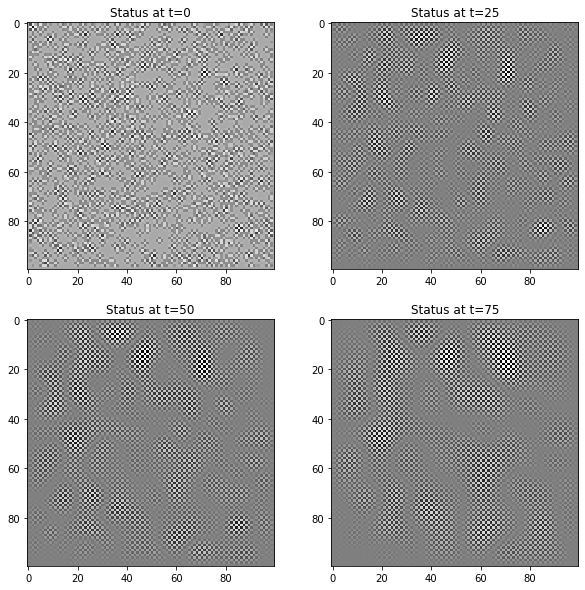

In [3]:
import matplotlib.pyplot as plt
import numpy as np

r=10
beta=10
D=100
dt=0.001
dx=1
N=100 #time disc
M=100 #space disc

Init=np.random.normal(0, 0.1, (M,M))
for i in range(M):
    for j in range(M):
        if (Init[i,j]<-0.1): Init[i,j]=1
        else: Init[i,j]=0
Soln=EDM(r, beta, D, dt, dx, N, M, Init)

plt.subplot(2,2,1)
plt.imshow(Soln[2,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=0")
plt.subplot(2,2,2)
plt.imshow(Soln[24,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=25")
plt.subplot(2,2,3)
plt.imshow(Soln[49,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=50")
plt.subplot(2,2,4)
plt.imshow(Soln[98,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=75")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


After completing the above simulation, we consider about the reaction process further. Now we introduce another parameter into the forest fire system-$\tau$ as the relaxation time or the delay time in the appearance of the fire flux. This makes the process of the spread of fire flux more realistic. Accordingly, the PDE equation describing such diffusion-reaction model can be expresses as following. $^{[1]}$

\begin{align}
\frac{\partial N}{\partial t} & = D \frac{\partial^2 N}{\partial x^2} + F(N) + \tau \frac{\partial F(N)}{\partial t} \\
\end{align}


#### Quiz 3-Please provide the discretized governing equation for solving the updated forest fire model and the corresponding codes.

Applying the finite element method to solve the above PDE, we need to discretize the spatial grids and time increment first and have the following iterative relation,

\begin{align}
N_{i,j} ^{n+1} & = N_{i,j} ^{n} + \frac{ \frac{D \Delta t}{\Delta x^2} (N_{i+1,j} ^{n} + N_{i,j+1} ^{n} - 4 N_{i,j} ^{n} + N_{i-1,j} ^{n} + N_{i,j-1} ^{n}) + r \Delta t (1-N_{i,j} ^{n})^\beta N_{i,j} ^{n}}{1-r(1-N_{i,j} ^{n})^\beta+\beta r N_{i,j} ^{n} (1-N_{i,j} ^{n})^{\beta -1}}\\
\end{align}

Following these states, we create a 100 by 100 grid with randomly picked state for each cell. The global status of the grid can be updated using FEM by each time step.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def EDM(tau, r, beta, D, dt, dx, N, M, Soln0):
    
    Soln=np.zeros((N, M, M))
    Soln[0,:,:]=Soln0
    Coeff=D*dt/dx**2

    if(Coeff>=0.5): print("Hard to converge")
    for n in range(1,N-1):
        temp=(Soln[n-1,0:-2,1:-1]+Soln[n-1,1:-1,0:-2]-4*Soln[n-1,1:-1,1:-1]+Soln[n-1,1:-1,2:]+Soln[n-1,2:,1:-1])        
        Soln[n,1:-1,1:-1]+=(Coeff*temp+dt*r*(1-Soln[n-1,1:-1,1:-1])**beta*Soln[n-1,1:-1,1:-1])/(1-tau*r*(1-Soln[n-1,1:-1,1:-1])**beta+tau*beta*r*(1-Soln[n-1,1:-1,1:-1])**(beta-1)*Soln[n-1,1:-1,1:-1])
            
    return Soln

#### Quiz 4-Please solve the system given that $r=10$, $\beta=10$, $D=10$, $\tau = 0.5$.

Plot the results at transition time.

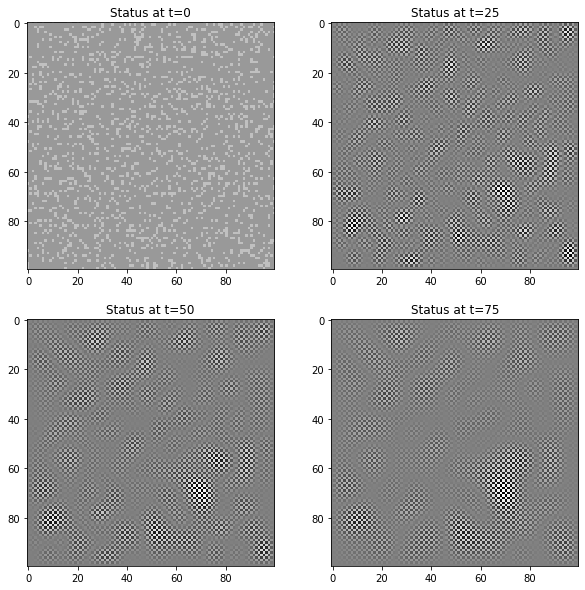

In [33]:
import matplotlib.pyplot as plt
import numpy as np
tau = 10
r=10
beta=10
D=100
dt=0.001
dx=1
N=100 #time disc
M=100 #space disc

Init=np.random.normal(0, 0.1, (M,M))
for i in range(M):
    for j in range(M):
        if (Init[i,j]<-0.1): Init[i,j]=1
        else: Init[i,j]=0
Soln=EDM(tau, r, beta, D, dt, dx, N, M, Init)

plt.subplot(2,2,1)
plt.imshow(Soln[0,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=0")
plt.subplot(2,2,2)
plt.imshow(Soln[24,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=25")
plt.subplot(2,2,3)
plt.imshow(Soln[49,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=50")
plt.subplot(2,2,4)
plt.imshow(Soln[98,:,:],cmap="gray",interpolation="nearest")
plt.title("Status at t=75")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


##### Reference

[1] Méndez, V. and Llebot, J.E., 1997. Hyperbolic reaction-diffusion equations for a forest fire model. Physical Review E, 56(6), p.6557.